In [155]:
import pandas as pd
import plotnine as pn
import numpy as np

from scipy.stats import ttest_1samp


In [ ]:
lexicon_property = "dp_medium"

In [156]:
df = pd.read_csv("/Users/nathanielimel/uw/projects/modals-effcomm/outputs/universe=experiment_prohibition/prior=semi_estimated/utility=importance/agent_type=literal/analysis/all_data.csv")

# Create alias for faceting
df["facet_var"] = df["original_name"] + " and variants"

pareto_data = df[df["dominant"] == True]
natural_data = df[df["natural"] == True]
variants_data = df[df["name"].str.contains("_variant_")]

/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/facets/facet.py:487: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.1

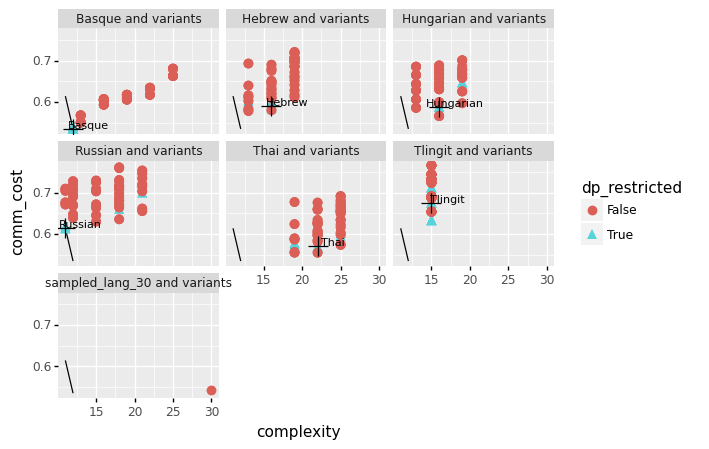

<ggplot: (402198186)>

In [157]:
# Facet plot
(
  # Set data and the axes
  pn.ggplot(
    mapping=pn.aes(x="complexity", y="comm_cost"),
  )
  + pn.geom_line(
    # remove faceting variable here so it is present in facet_wrap
    data=pareto_data.drop(["facet_var"], axis=1),
  )
  + pn.geom_point(  # all langs
      data=df,
      stroke=0,
      # alpha=.5,
      mapping=pn.aes(
        # color=original_name,
        color=lexicon_property,
        shape=lexicon_property,
      ),
      size=4,
  )
  + pn.geom_point( # natural langs
    data=natural_data,
    shape="+",
    size=8,
  )
  # Annotate originals
  + pn.geom_text(
    data=natural_data,
    mapping=pn.aes(label="name"),
    size=8,
    nudge_x=2,
    nudge_y=0.01,
  )  
  
  + pn.facet_wrap("facet_var")
  
#   + pn.scale_color_discrete()

)

In [158]:
# stats

# For each natural language, 
# get the increase in optimality it has over variants, for each variant
# Visualize this for each language
# And report the ttest(increase, 0)

for lang in natural_data.original_name:
    # If DP has higher optimality, then this should be a list of positive floats
    lang_variants = variants_data[variants_data["original_name"] == lang]
    print(lang)
    natural_data[natural_data["original_name"] == lang].optimality.item() - lang_variants.optimality

Thai
Hungarian
Russian
Tlingit
Hebrew
Basque


In [159]:
natural_data[natural_data["original_name"] == "Basque"]

,complexity,simplicity,informativity,comm_cost,iff,sav,dlsav,deontic_priority,dp_trivial,dp_nontrivial,epistemic_priority,circ_priority,dp_restricted,optimality,natural,dominant,name,original_name,dp,facet_var
605,12,0.6,0.46554,0.53446,1.0,1.0,True,True,False,True,True,True,True,0.999976,True,True,Basque,Basque,dp_restricted,Basque and variants


In [160]:
dfs = []
for lang in natural_data.original_name:
    # If DP has higher optimality, then this should be a list of positive floats
    lang_variants = variants_data[variants_data["original_name"] == lang]
    optimality_increase = list(
        natural_data[natural_data["original_name"] == lang].optimality.item()
        - lang_variants.optimality
    )
    dfs.append(
        pd.DataFrame(
            data = zip(
                [lang]*len(optimality_increase), 
                optimality_increase,
                lang_variants.name,
                lang_variants.dp_restricted,
            ),
            columns = ["name", "gain_over_variant", "variant", lexicon_property],
        )
    )
df_opt_gain = pd.concat(dfs)
df_opt_gain

,name,gain_over_variant,variant,dp_restricted
0,Thai,0.000000,Thai_variant_0,True
1,Thai,0.016258,Thai_variant_1,False
2,Thai,0.025637,Thai_variant_2,False
3,Thai,0.016258,Thai_variant_3,False
4,Thai,0.025637,Thai_variant_4,False
...,...,...,...,...
95,Basque,0.247773,Basque_variant_95,False
96,Basque,0.252584,Basque_variant_96,False
97,Basque,0.252584,Basque_variant_97,False
98,Basque,0.252584,Basque_variant_98,False


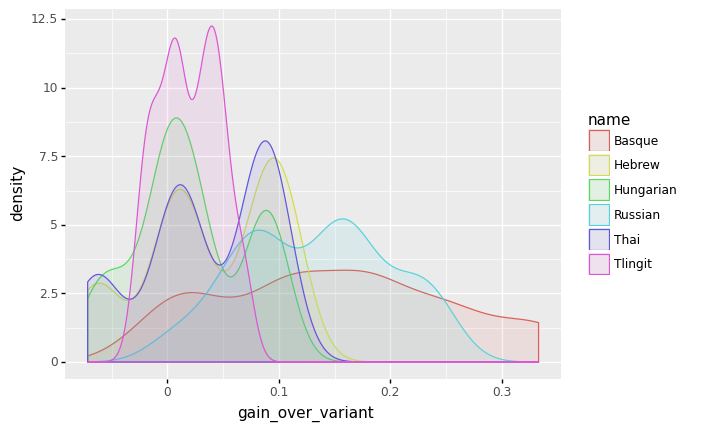

<ggplot: (396833913)>

In [161]:
(
    pn.ggplot(
        df_opt_gain,
        pn.aes(
            x = "gain_over_variant",
            # y = pn.after_stat("count"),
           fill = "name", color = "name",
        )
    )
    + pn.geom_density(
        alpha = 0.1, 
        # position = "stack",
    )
    # + pn.facet_wrap(lexicon_property)
)

In [162]:
dfs = []
for lang in natural_data.name:
    # both the lang and its variants
    langs = df[df["original_name"] == lang]
    dp_opt = langs[langs[lexicon_property] == True]["optimality"].mean()
    nondp_opt = langs[langs[lexicon_property] == False]["optimality"].mean()
    dfs.append(
        pd.DataFrame(
            {
                "lang": [lang],
                "dp": [dp_opt],
                "nondp": [nondp_opt],
                "dp - nondp": [dp_opt - nondp_opt],
            }
        )
    )
df_mean_diff = pd.concat(dfs)
df_mean_diff

,lang,dp,nondp,dp - nondp
0,Thai,0.762446,0.728025,0.034421
0,Hungarian,0.870242,0.874672,-0.004430
0,Russian,0.880622,0.837711,0.042912
0,Tlingit,0.881094,0.854365,0.026729
0,Hebrew,0.888537,0.849943,0.038594
0,Basque,0.999301,0.826856,0.172445


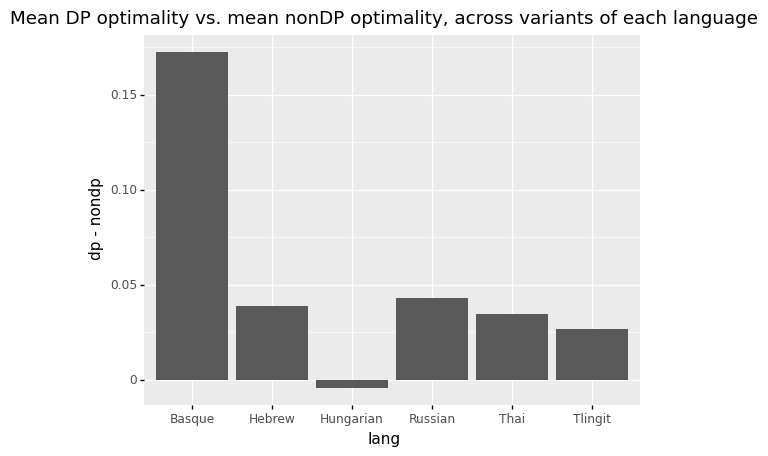

<ggplot: (401817865)>

In [163]:
(
    pn.ggplot(
        df_mean_diff,
        pn.aes(
            x= "lang",
            y = "dp - nondp",
        )
    )
    # + pn.geom_point()
    + pn.geom_col()
    + pn.ggtitle("Mean DP optimality vs. mean nonDP optimality, across variants of each language")
)